In [29]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.power import FTestAnovaPower

In [30]:
# set the number of rows
n = 80

# generate the data set

# create the categorical variables
# create the constant of 1 virus
virus = ['Influenza_B'] * n

# create the surfaces in the data set by assigning each equaly
surface = ["Stainless_Steel"] * 20 + ["Plastic"] * 20 + ["Granite"] * 20 + ["Glass"] * 20

# create the options for disinfectant
# need to select the two things equaly within each value of surface
disinfectant = []
for i in range(4):
    disinfectant.extend(["Control"] * 10 + ["Disinfectant"] * 10)

# create the application method
application = []
for i in range(8):
    application.extend(["Wipes"] * 5 + ["Spray"] * 5)

# create dataframe containing the categorical variables
df = pd.DataFrame({
    "Virus": virus,
    "Surface": surface,
    "Disinfectant": disinfectant,
    "Application" : application
})

# create continuous variables and add them to the dataframe
# use random seed to ensure replicability
np.random.seed(42)

# create the random values for temperature
df["Temperature_Celsius"] = np.random.uniform(17, 27, 80)
df["Temperature_Celsius"] = df["Temperature_Celsius"].round(2) # add to data frame and round

# function to create the random values for porosity based on surface
def get_porosity(surface):
    if surface == "Stainless_Steel":
        return np.random.uniform(0,0.2) #range determined from avg porosity of stainless steel
    elif surface == "Plastic":
        return 0
    elif surface == "Granite":
        return np.random.uniform(0.05,1.5) # range determined from avg. porosity of granite
    else:
        return 0

df['Porosity'] = df['Surface'].apply(get_porosity) #run function using surface as input
df['Porosity'] = df['Porosity'].round(2) #add to dataframe and round


# create random values for time based on all input variables

# set seed for reproducibility
np.random.seed(42)

# empty list
time_list = []

# loop to create all time values based on inputs
for i, row in df.iterrows():
    if row["Disinfectant"] == "Control":
        # control: 24–48 h in minutes
        if row["Surface"] == "Stainless_Steel":
            time = np.random.randint(1900, 2100)
        elif row["Surface"] == "Plastic":
            time = np.random.randint(2000, 2200)
        elif row["Surface"] == "Granite":
            time = np.random.randint(1800, 2000)
        else:  # glass
            time = np.random.randint(1850, 2050)
    else:
        # disinfectant: 2–10 minutes
        if row["Surface"] == "Stainless_Steel":
            if row["Application"] == "Wipes":
                time = np.random.randint(3, 10)
            elif row["Application"] == "Spray":
                time = np.random.randint(2, 8)
            else:
                time = np.random.randint(4, 6)
        elif row["Surface"] == "Plastic":
            if row["Application"] == "Wipes":
                time = np.random.randint(4, 10)
            elif row["Application"] == "Spray":
                time = np.random.randint(2, 7)
            else:
                time = np.random.randint(3, 6)
        elif row["Surface"] == "Granite":
            if row["Application"] == "Wipes":
                time = np.random.randint(4, 10)
            elif row["Application"] == "Spray":
                time = np.random.randint(3, 8)
            else:
                time = np.random.randint(5, 7)
        else:  # glass
            if row["Application"] == "Wipes":
                time = np.random.randint(3, 10)
            elif row["Application"] == "Spray":
                time = np.random.randint(2, 8)
            else:
                time = np.random.randint(3, 5)

    time_list.append(time)

df["Time"] = time_list

df.head(25)

,Virus,Surface,Disinfectant,Application,Temperature_Celsius,Porosity,Time
0,Influenza_B,Stainless_Steel,Control,Wipes,20.75,0.17,2002
1,Influenza_B,Stainless_Steel,Control,Wipes,26.51,0.12,2079
2,Influenza_B,Stainless_Steel,Control,Wipes,24.32,0.07,1992
3,Influenza_B,Stainless_Steel,Control,Wipes,22.99,0.01,1914
4,Influenza_B,Stainless_Steel,Control,Wipes,18.56,0.06,2006
5,Influenza_B,Stainless_Steel,Control,Spray,18.56,0.07,1971
6,Influenza_B,Stainless_Steel,Control,Spray,17.58,0.15,2088
7,Influenza_B,Stainless_Steel,Control,Spray,25.66,0.13,1920
8,Influenza_B,Stainless_Steel,Control,Spray,23.01,0.18,2002
9,Influenza_B,Stainless_Steel,Control,Spray,24.08,0.09,2021


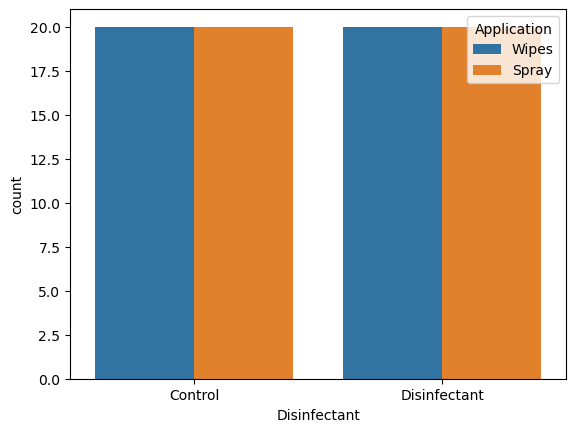

In [31]:
sns.countplot(x="Disinfectant", hue="Application", data=df)
plt.show()

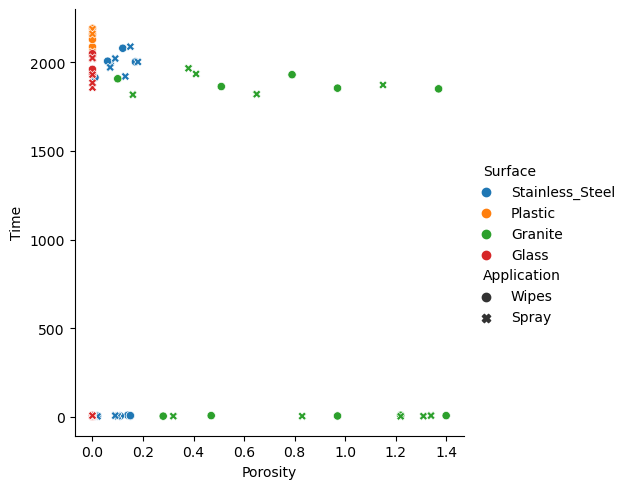

In [32]:
sns.relplot(data=df, x='Porosity', y='Time', hue='Surface', style='Application')
plt.show()

# ANOVA TEST

ANOVA 1: Testing the interaction between Disinfectant and Surface Type

In [33]:
# We use 'Time' as the dependent variable to see if disinfectant effectiveness depends on the specific surface it's applied to.
model_anova1 = smf.ols("Time ~ C(Disinfectant) * C(Surface)", data=df).fit()
anova_results_1 = anova_lm(model_anova1, typ=2)

print("ANOVA 1: Disinfectant * Surface")
print(anova_results_1)

ANOVA 1: Disinfectant * Surface
                                 sum_sq    df             F         PR(>F)
C(Disinfectant)             78550624.80   1.0  42207.439794  1.974439e-101
C(Surface)                    128038.05   3.0     22.932804   1.585070e-10
C(Disinfectant):C(Surface)    129070.30   3.0     23.117690   1.378547e-10
Residual                      133996.40  72.0           NaN            NaN


ANOVA 2: Testing the interaction between Disinfectant and Application Method

In [34]:
# This checks if 'Spray' vs 'Wipes' actually changes the 'Time' outcome  differently depending on whether it's a Control or Disinfectant.
model_anova2 = smf.ols("Time ~ C(Disinfectant) * C(Application)", data=df).fit()
anova_results_2 = anova_lm(model_anova2, typ=2)

print("\nANOVA 2: Disinfectant * Application")
print(anova_results_2)


ANOVA 2: Disinfectant * Application
                                     sum_sq    df             F        PR(>F)
C(Disinfectant)                 78550624.80   1.0  15381.610196  1.756526e-89
C(Application)                      1692.80   1.0      0.331480  5.664896e-01
C(Disinfectant):C(Application)      1296.05   1.0      0.253790  6.158764e-01
Residual                          388115.90  76.0           NaN           NaN


# ANCOVA TEST

ANCOVA TEST 1: Disinfectant * Surface + Porosity

In [35]:
model1 = smf.ols("Time ~ C(Disinfectant)*C(Surface) + Porosity", data=df).fit()
model1

#stats models makes a regression linear model

In [36]:
anova_results1 = anova_lm(model1, typ=2)
anova_results1

,sum_sq,df,F,PR(>F)
C(Disinfectant),7.681281e+07,1.0,40780.053719,9.933554e-100
C(Surface),9.239703e+04,3.0,16.351248,3.531572e-08
C(Disinfectant):C(Surface),1.251964e+05,3.0,22.155663,3.120102e-10
Porosity,2.616747e+02,1.0,0.138924,7.104639e-01
Residual,1.337347e+05,71.0,NaN,NaN


ANCOVA TEST 2: Disinfectant * Surface + Temperature_Celsius

In [37]:
model2 = smf.ols("Time ~ C(Disinfectant)*C(Surface) + Temperature_Celsius", data=df).fit()
model2

#stats models makes a regression linear model

In [38]:
anova_results2 = anova_lm(model2, typ=2)
anova_results2

,sum_sq,df,F,PR(>F)
C(Disinfectant),7.835930e+07,1.0,42846.861516,1.722468e-100
C(Surface),1.299726e+05,3.0,23.689663,9.850972e-11
C(Disinfectant):C(Surface),1.275775e+05,3.0,23.253116,1.362514e-10
Temperature_Celsius,4.150010e+03,1.0,2.269225,1.364023e-01
Residual,1.298464e+05,71.0,NaN,NaN


Power Analysis

In [39]:
# Create groupings by surface
groups = [
    df[df["Surface"] == "Glass"]["Time"].dropna(),
    df[df["Surface"] == "Granite"]["Time"].dropna(),
    df[df["Surface"] == "Stainless_Steel"]["Time"].dropna(),
    df[df["Surface"] == "Plastic"]["Time"].dropna(),
]

# Calculate mean of combined data
data = np.concatenate(groups)
data_mean = np.mean(data)

# Calculate sum of squares between groups
ss_between = sum(
    len(group) * (np.mean(group) - data_mean) ** 2
    for group in groups
)

# Calculate sum of squares within groups
ss_within = sum(
    np.sum((group - np.mean(group)) ** 2)
    for group in groups
)

# Calculate effect size using Cohen's f
effect_size = np.sqrt(ss_between / ss_within)

# Display effect size result
print(f'Effect size: {effect_size:.2f}')

# Conduct power analysis
power_analysis = FTestAnovaPower()
sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    power=0.80,
    alpha=0.05,
    k_groups=4
)

# Display power analysis result
print(f'The sample size required per group is: {sample_size:.0f}')

Effect size: 0.04
The sample size required per group is: 6715
